## Data Science Bootcamp

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 231](#1)
* [Ćwiczenie 232](#2)
* [Ćwiczenie 233](#3)
* [Ćwiczenie 234](#4)
* [Ćwiczenie 235](#5)
* [Ćwiczenie 236](#6)
* [Ćwiczenie 237](#7)
* [Ćwiczenie 238](#8)
* [Ćwiczenie 239](#9)
* [Ćwiczenie 240](#10)

### <a name='0'></a>Import biblioteki

In [ ]:
import numpy as np
import pandas as pd

np.__version__

'1.19.5'

### <a name='1'></a> Ćwiczenie 231
Zaimportuj bibliotekę _tensorflow_ w wersji 2.x.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

tf.__version__

'2.4.1'

Załaduj dane Fashion MNIST wykorzystując bibliotekę _tensorflow_. Odpowiednio zbiór treningowy (_X\_train_, _y\_train_) oraz testowy (_X\_test_, _y\_test_).

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data
(X_train,y_train),(X_test,y_test) = load_data()

Sprawdź rozmiar zbiorów treningowych i testowych.

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

### <a name='2'></a> Ćwiczenie 232 
Wykorzytując bibliotekę _matplotlib_ wyświetl obraz ze zbioru treningowego z indeksem 40.

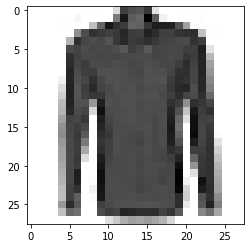

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[40], cmap='gray_r')

Wyświetl numer klasy dla próbki ze zbioru treningowego z ineksem 40.

In [ ]:
y_train[40]

6

### <a name='3'></a> Ćwiczenie 233
Wystandaryzuj dane. Podziel wartości tablic _X\_train_ oraz _X\_test_ przez wartość 255.0.

In [ ]:
X_train = X_train/255.
X_test = X_test/255.

### <a name='4'></a> Ćwiczenie 234
Zaimportuj klasę _Sequential_ z biblioteki _tensorflow_ wykorzystując pakiet _keras_.

In [ ]:
from tensorflow.keras.models import Sequential

Zaimportuj warstwy _Flatten_ oraz _Dense_ z biblioteki _tensorflow_ wykorzystując pakiet _keras_.

In [ ]:
from tensorflow.keras.layers import Flatten, Dense

### <a name='5'></a> Ćwiczenie 235
Zbuduj model klasy _Sequential_.

In [ ]:
model = Sequential()

Dodaj pierwszą warstwę typu _Flatten_ wraz z odpowiednio dobranym parametrem _input_shape_.

In [ ]:
model.add(Flatten(input_shape=(28,28)))

Dodaj kolejną warstwę typu _Dense_ z 128 neuronami i funkcją aktywacji _relu_.

In [ ]:
model.add(Dense(128,activation='relu'))

Dodaj ostatnią warstwę typu _Dense_ z 10 neuronami i funkcją aktywacji _softmax_.

In [ ]:
model.add(Dense(10,activation='softmax'))

Wyświetl podsumowanie modelu.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### <a name='6'></a> Ćwiczenie 236
Skompiluj model. Wykorzystaj optymalizator _rmsprop_, funkcję straty _sparse_categorical_crossentropy_ oraz metrykę _accuracy_.

In [ ]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics='accuracy')

### <a name='7'></a> Ćwiczenie 237
Dopasuj model do danych treningowych, ustawiając 10 epok oraz podział na zbiór walidacyjny wynoszący 0.2.

In [ ]:
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4434 - accuracy: 0.8440 - val_loss: 0.4461 - val_accuracy: 0.8415
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4357 - accuracy: 0.8479 - val_loss: 0.4449 - val_accuracy: 0.8404
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4294 - accuracy: 0.8497 - val_loss: 0.4418 - val_accuracy: 0.8438
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4245 - accuracy: 0.8515 - val_loss: 0.4320 - val_accuracy: 0.8466
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4193 - accuracy: 0.8531 - val_loss: 0.4283 - val_accuracy: 0.8446
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4150 - accuracy: 0.8552 - val_loss: 0.4265 - val_accuracy: 0.8471
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4103 - accuracy: 0.8564 - val_loss: 0.4226 - val_accuracy:

### <a name='8'></a> Ćwiczenie 238
Dokonaj predykcji modelu na podstawie danych testowych.

In [ ]:
y_pred = model.predict_classes(X_test)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1, ..., 8, 1, 5])

Zbuduj macierz konfuzji (macierz pomyłek).

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[833,   3,  10,  44,   7,   3,  84,   0,  16,   0],
       [  5, 961,   2,  23,   5,   0,   3,   0,   1,   0],
       [ 23,   4, 685,  11, 173,   1,  96,   0,   7,   0],
       [ 35,  14,   9, 861,  38,   0,  39,   0,   4,   0],
       [  0,   3,  75,  33, 800,   0,  84,   0,   5,   0],
       [  0,   0,   0,   1,   0, 909,   0,  62,   4,  24],
       [168,   1,  96,  35, 116,   0, 561,   0,  23,   0],
       [  0,   0,   0,   0,   0,  29,   0, 953,   0,  18],
       [  3,   1,   5,  10,   3,   5,  17,   6, 950,   0],
       [  0,   0,   0,   0,   0,  15,   0,  58,   2, 925]])

### <a name='9'></a> Ćwiczenie 239
Zbuduj obiekt pandas _DataFrame_ zawierający predykcje modelu. Nadaj nazwę kolumny _prediction_ i przypisz do zmiennej _results_.

In [ ]:
results = pd.DataFrame(y_pred, columns=['prediction'])
results

,prediction
0,9
1,2
2,1
3,1
4,6
...,...
9995,9
9996,1
9997,8
9998,1


Przypisz nową kolumnę z wartościami ze zmiennej _y\_test_ i nazwij ją _y\_test_.

In [ ]:
results['y_test'] = y_test

In [ ]:
results

,prediction,y_test
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
...,...,...
9995,9,9
9996,1,1
9997,8,8
9998,1,1


Przypisz nową kolumnę o nazwie _is_misclassified_, która zwróci 1, gdy próbki zostaną błędnie sklasyfikowane, w przeciwnym przypadku 0.

In [ ]:
(results['prediction'] != results['y_test']).astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int64

In [ ]:
results['is_misclassified'] = (results['prediction'] != results['y_test']).astype(int)

In [ ]:
print(results)

      prediction  y_test  is_misclassified
0              9       9                 0
1              2       2                 0
2              1       1                 0
3              1       1                 0
4              6       6                 0
...          ...     ...               ...
9995           9       9                 0
9996           1       1                 0
9997           8       8                 0
9998           1       1                 0
9999           5       5                 0

[10000 rows x 3 columns]


In [ ]:
results['is_misclassified'].value_counts()

0    8438
1    1562
Name: is_misclassified, dtype: int64

### <a name='10'></a> Ćwiczenie 240
Zapisz obiekt _results_ do pliku _results.csv_.

In [ ]:
results.to_csv('results.csv', index=False)

In [ ]:
!head results.csv

prediction,y_test,is_misclassified
9,9,0
2,2,0
1,1,0
1,1,0
6,6,0
1,1,0
4,4,0
6,6,0
5,5,0
